# GEO-Visualisations (2017)

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import json
import os            
import pandas as pd    
import seaborn as sns
import geopandas as gpd
import palettable as pltt
from seaborn import palplot
from pandas.plotting import scatter_matrix
from pysal.viz import mapclassify
import numpy as np
from shapely.geometry import Point
import contextily as ctx
from matplotlib.lines import Line2D

In [2]:
# CLOROPLETH MAP PLOT (BASED ON QUANTILES)
def geo_map(geo_base,df_geo,ch_column):
    """
    Creates a map based on 'fisher jenks distribution' given a certain column of interest of the DH_geo_calls dataframe.
    ...
    
    Arguments
    ---------
    geo_base      : Geodataframe 
            Geodatframe containing the polygon that define The Hague neighbourhoods.
    df_geo        : Geodataframe 
            Geodataframe containing the shape of the neighbourhoods and number of calls for each one of them. 
    ch_column     : series
            Column of interest selected from the df_geo geo-dataframe.
    colour        : matplotlib.colors.LinearSegmentedColormap
            Chosen colour for the map. It should be described as follows: plt.cm.colour
    Returns
    -------
    None
    """
    # Set up figure and axes
    f, ax = plt.subplots(1, figsize=(15,15))
    # Plot base layer of The Hague in grey
    geo_base.plot(ax=ax, facecolor='grey', alpha=0.2, linewidth=0.1,)
    df_geo.plot(ax=ax, column=ch_column, scheme='fisher_jenks', alpha=1, k=7, edgecolor='w', linewidth=0.1, legend=True)
    #remove axis 
    ax.set_axis_off()
    #set figure title 
    f.suptitle('Number of ambulance calls per neighbourhood', weight='bold', fontsize=20, x=0.5,y=0.85)
    #display plot
    plt.show()
    
    return None

In [3]:
DH_shape=gpd.read_file('shapefile data/neighborhoods.shp')
type(DH_shape)

geopandas.geodataframe.GeoDataFrame

We can explore the structure of the shape file by displaying the first five rows. 

In [4]:
DH_shape.head()

,neighb_cbs,neigb_cijf,geometry
0,Oostduinen,70 Oostduinen,"POLYGON ((4.30290 52.12832, 4.30298 52.12827, ..."
1,Belgisch Park,71 Belgisch Park,"POLYGON ((4.28056 52.11706, 4.28053 52.11706, ..."
2,Westbroekpark,73 Westbroekpark,"POLYGON ((4.29171 52.10745, 4.29181 52.10739, ..."
3,Duttendel,74 Duttendel,"POLYGON ((4.32252 52.10768, 4.32252 52.10766, ..."
4,Nassaubuurt,48 Nassaubuurt,"POLYGON ((4.31943 52.09247, 4.31943 52.09247, ..."


In [5]:
DH_shape.tail()

,neighb_cbs,neigb_cijf,geometry
109,De Rivieren,117 De Rivieren,"POLYGON ((4.39709 52.07476, 4.39778 52.07496, ..."
110,De Lanen,118 De Lanen,"POLYGON ((4.40245 52.06319, 4.40242 52.06314, ..."
111,De Velden,119 De Velden,"POLYGON ((4.40593 52.07659, 4.40607 52.07649, ..."
112,De Vissen,120 De Vissen,"POLYGON ((4.41188 52.07213, 4.41192 52.07210, ..."
113,Rietbuurt,121 Rietbuurt,"POLYGON ((4.41539 52.05744, 4.41538 52.05707, ..."


In [6]:
DH_shape.shape

(114, 3)

Let's analyse the geo-information contained into the shape file by plotting our 'DH_shape' file.

<AxesSubplot:>

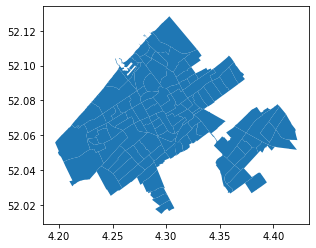

In [7]:
DH_shape.plot()

### EDA shape file
If we want to check if our shape file is not 'corrupted' we can analyse if it contains any kind of NaN values. 

In [8]:
DH_shape.isna().sum()

neighb_cbs    0
neigb_cijf    0
geometry      0
dtype: int64

## Ambulance calls geo-visualisation (2017)

Let us start this analysis with our 2017 dataframe. 

In [9]:
path='Calls data/Calls_2017.csv'
df= pd.read_csv(path) 
df.head()

,Month,Day,Time,Longitude,Latitude
0,1,1,00:00:37,4.260750,52.076860
1,1,1,00:12:10,4.277178,52.067380
2,1,1,00:15:54,4.404748,52.073556
3,1,1,00:17:52,4.296379,52.030004
4,1,1,00:30:41,4.251508,52.049571


What we have for each ambulance call is its latitude and longitude. Given those informations we can add to our dataframe a new 'geometry' column that will contain the geographical information of each point.  
**Note**: This will be particularly helpful when we will have to understand if our ambulance calls are actually inside the districts contained in the shapefile of The Hague. 

In [10]:
# creating a geometry column 
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]

# Coordinate reference system : WGS84
crs = 'epsg:4326'

# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs=crs)

In [11]:
gdf.head()

,Month,Day,Time,Longitude,Latitude,geometry
0,1,1,00:00:37,4.260750,52.076860,POINT (4.26075 52.07686)
1,1,1,00:12:10,4.277178,52.067380,POINT (4.27718 52.06738)
2,1,1,00:15:54,4.404748,52.073556,POINT (4.40475 52.07356)
3,1,1,00:17:52,4.296379,52.030004,POINT (4.29638 52.03000)
4,1,1,00:30:41,4.251508,52.049571,POINT (4.25151 52.04957)


In [12]:
gdf.shape

(60233, 6)

We can now create a first geo-visualisation of our ambulance calls points. 

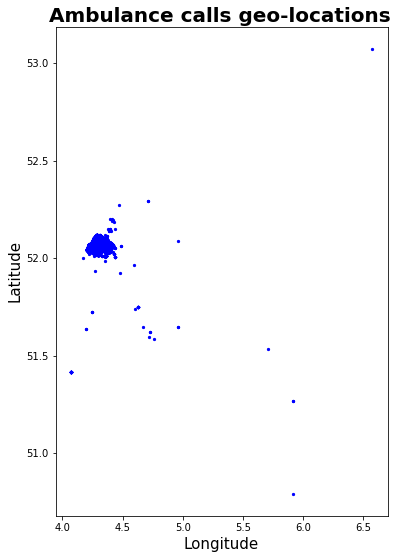

In [13]:
# Set up figure and axes
f, ax = plt.subplots(1, figsize=(9,9))
# Plot all points
gdf.plot(ax=ax, marker='o', color='b', markersize=5)
#remove axis 
#ax.set_axis_off()
#set figure title 
f.suptitle('Ambulance calls geo-locations' , weight='bold', fontsize=20, x=0.51,y=0.91)
# Save figure to a PNG file
plt.ylabel("Latitude", fontsize=15)
plt.xlabel("Longitude", fontsize=15)
plt.savefig('Figure 1.jpg', dpi=1080)
plt.show()

From this plot it is really easy to understand that some values are actually outliers. (some ambulance calls are not even made in the Netherlands!)  
What we can do is take each point of our new dataframe and verify if it lies inside any of the polygons contained into the shape file of Den Haag. If a point is not contained by any of these polygons than we can simply discard it from our dataset.  
We can describe this process through the following checklist: 
1. Take one point referred to an ambulance call 
2. Check if this point is contained by any of the polygons representing the neighbourhoods of The Hague 
3. If a point is inside a polygon than save the neighbourhood inside a list 
4. if the point is not inside the neighbourhood than save 'Outside' as a neighbourhood for this point   

This method will also allow us to allocate for each point its associated neighbourhood in The Hague.  


In [14]:
gdf.shape

(60233, 6)

In [15]:
# To "join" two data frame one of which has points and the second has polygons
# you need to use a function that is called spatial join gpd.sjoin

# Before doing that make sure that data frames are in their original projection

In [16]:
crs = "EPSG:28992"

In [17]:
points = gdf.copy()
points = points.to_crs(crs)

polygons = DH_shape.copy()
polygons = polygons.to_crs(crs)

In [18]:
points.shape

(60233, 6)

In [19]:
polygons.shape

(114, 3)

We can use the 'sjoin' method to merge the two geodataframes we created. By doing this we can take into account only the ambulance calls that are placed inside our neighbourhoods. 

In [20]:
gdf = gpd.sjoin(points, polygons, op="within").reset_index(drop=True)

In [21]:
gdf.head()

,Month,Day,Time,Longitude,Latitude,geometry,index_right,neighb_cbs,neigb_cijf
0,1,1,00:00:37,4.260750,52.076860,POINT (77779.000 454885.996),24,Bloemenbuurt-Oost,51 Bloemenbuurt-Oost
1,1,1,01:08:07,4.262946,52.079263,POINT (77933.685 455150.929),24,Bloemenbuurt-Oost,51 Bloemenbuurt-Oost
2,1,1,12:08:11,4.257594,52.073567,POINT (77557.002 454522.990),24,Bloemenbuurt-Oost,51 Bloemenbuurt-Oost
3,1,1,20:31:33,4.262200,52.076712,POINT (77878.134 454868.013),24,Bloemenbuurt-Oost,51 Bloemenbuurt-Oost
4,1,2,07:35:53,4.262329,52.079008,POINT (77890.926 455123.216),24,Bloemenbuurt-Oost,51 Bloemenbuurt-Oost


In [22]:
gdf.shape

(59804, 9)

We can drop the 'index_right' column since the only thing we care about is the association between the ambulance calls and the neighbourhood from which they were placed. 

In [23]:
gdf= gdf.drop('index_right', axis=1)
gdf.head()

,Month,Day,Time,Longitude,Latitude,geometry,neighb_cbs,neigb_cijf
0,1,1,00:00:37,4.260750,52.076860,POINT (77779.000 454885.996),Bloemenbuurt-Oost,51 Bloemenbuurt-Oost
1,1,1,01:08:07,4.262946,52.079263,POINT (77933.685 455150.929),Bloemenbuurt-Oost,51 Bloemenbuurt-Oost
2,1,1,12:08:11,4.257594,52.073567,POINT (77557.002 454522.990),Bloemenbuurt-Oost,51 Bloemenbuurt-Oost
3,1,1,20:31:33,4.262200,52.076712,POINT (77878.134 454868.013),Bloemenbuurt-Oost,51 Bloemenbuurt-Oost
4,1,2,07:35:53,4.262329,52.079008,POINT (77890.926 455123.216),Bloemenbuurt-Oost,51 Bloemenbuurt-Oost


From the 'shape' analysis we can understand that we excluded some ambulance calls points.  
We can check if our points are just inside The Hague through the following geo-visualisation. 

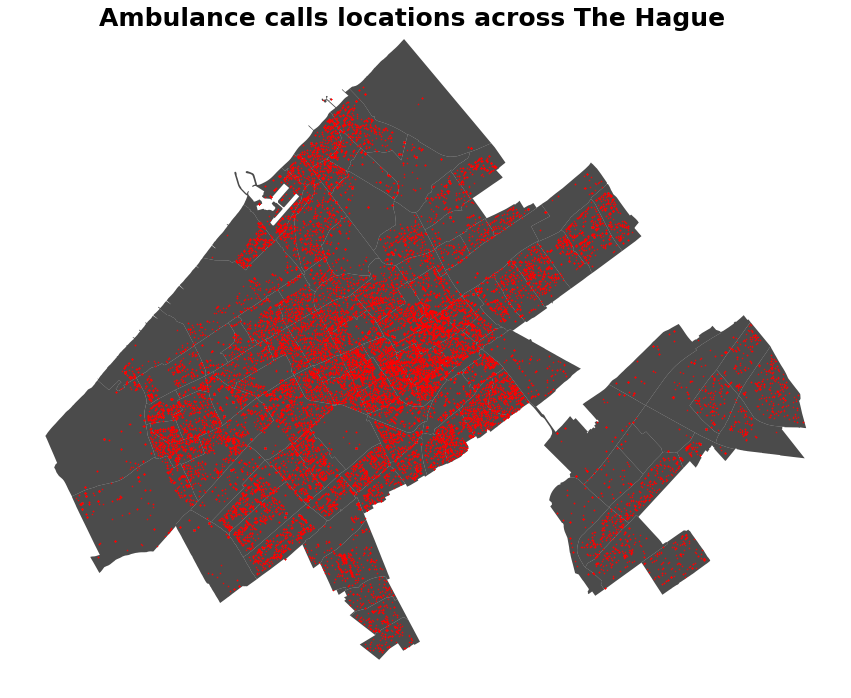

In [24]:
gdf = gdf.to_crs('epsg:4326') # Coordinate reference system : WGS84
# Set up figure and axes
f, ax = plt.subplots(1, figsize=(15,15))
#plot map of The Hague
DH_shape.plot(ax=ax, facecolor='black', alpha=0.7, linewidth=1)
# Plot all points
gdf.plot(ax=ax, marker='o', color='r', markersize=0.3)
#remove axis 
ax.set_axis_off()
#set figure title 
f.suptitle('Ambulance calls locations across The Hague' , weight='bold', fontsize=25, x=0.5,y=0.82)
# Save figure to a PNG file
plt.savefig('Figure 2.jpg', dpi=1080)
plt.show()

In [25]:
neigh_calls=gdf['neighb_cbs'].value_counts(sort=False)
neigh_calls=pd.DataFrame(neigh_calls)

In [26]:
neigh_calls=neigh_calls.rename(columns={'neighb_cbs':'Total calls'})
neigh_calls.head()

,Total calls
Bloemenbuurt-Oost,544
Rustenburg,349
De Velden,135
Parkbuurt oosteinde,115
Kerketuinen en Zichtenburg,328


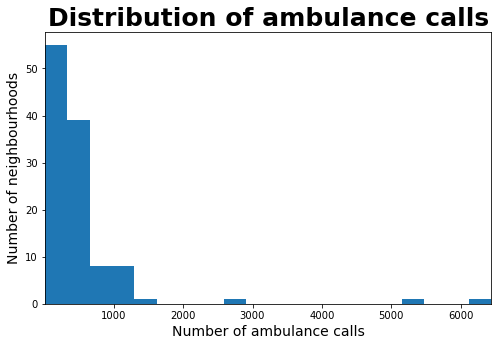

In [27]:
fig, ax = plt.subplots(1,1, figsize=(8,5)) 
ax.hist(neigh_calls['Total calls'], bins=20)
ax.set_xlabel('Number of ambulance calls', fontsize = 14)
ax.set_ylabel('Number of neighbourhoods', fontsize = 14)
ax.set_title('Distribution of ambulance calls', fontsize = 25, weight='bold')
ax.set_xlim(np.min(neigh_calls['Total calls']), np.max(neigh_calls['Total calls']))
# Save figure to a PNG file
plt.savefig('Figure 3.jpg', dpi=1080)
plt.show()

From this last histogram we can understand that there are three neighbourhoods that could be identified as 'outliers'.  
We can analsyse the distribution of ambulance calls also through a cloropleth map. 

In [28]:
# first: join the DH_shape dataframe with the neigh_calls one 
DH_geo_calls=DH_shape.join(neigh_calls, on='neighb_cbs')
DH_geo_calls.head()

,neighb_cbs,neigb_cijf,geometry,Total calls
0,Oostduinen,70 Oostduinen,"POLYGON ((4.30290 52.12832, 4.30298 52.12827, ...",41
1,Belgisch Park,71 Belgisch Park,"POLYGON ((4.28056 52.11706, 4.28053 52.11706, ...",1450
2,Westbroekpark,73 Westbroekpark,"POLYGON ((4.29171 52.10745, 4.29181 52.10739, ...",157
3,Duttendel,74 Duttendel,"POLYGON ((4.32252 52.10768, 4.32252 52.10766, ...",128
4,Nassaubuurt,48 Nassaubuurt,"POLYGON ((4.31943 52.09247, 4.31943 52.09247, ...",110


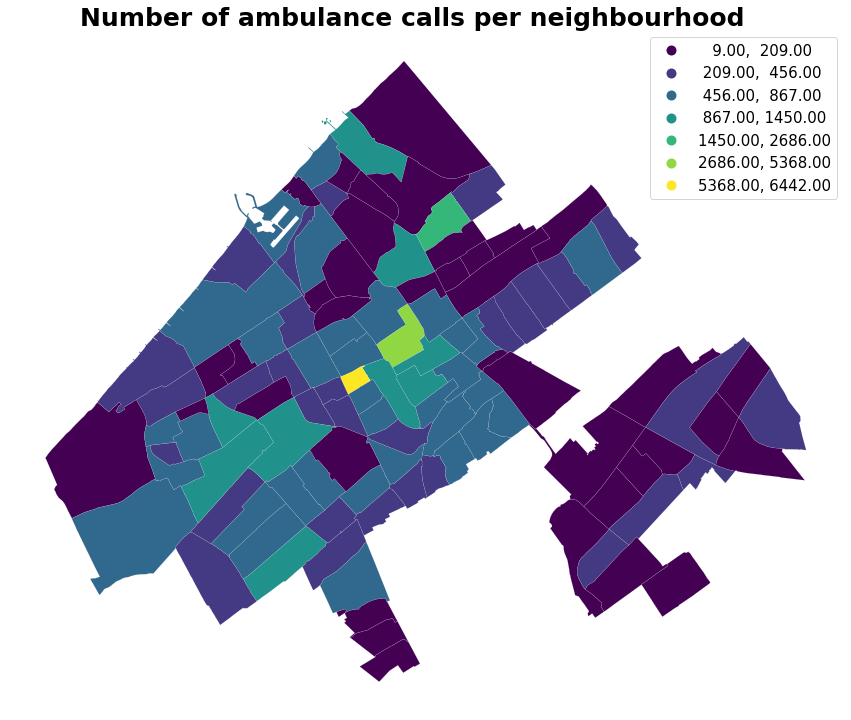

In [29]:
 # Set up figure and axes
f, ax = plt.subplots(1, figsize=(15,15))
# Plot base layer of The Hague in grey
DH_shape.plot(ax=ax, facecolor='grey', alpha=0.2, linewidth=0.1,)
DH_geo_calls.plot(ax=ax, column='Total calls', scheme='fisher_jenks', alpha=1, k=7, edgecolor='w', linewidth=0.1, legend=True, legend_kwds={'fontsize': '15'})
#remove axis 
ax.set_axis_off()
#set figure title 
f.suptitle('Number of ambulance calls per neighbourhood', weight='bold', fontsize=25, x=0.5,y=0.84)
# Save figure to a PNG file
plt.savefig('Figure 4.jpg', dpi=1080)
#display plot
plt.show()

In [30]:
outliers=neigh_calls[neigh_calls['Total calls']>2000].index.tolist()
outliers 

['Kortenbos', 'Transvaalkwartier-Noord', 'Waalsdorp']

In [31]:
df_outliers=gdf[gdf['neighb_cbs'].isin(outliers)]
df_outliers.head()

,Month,Day,Time,Longitude,Latitude,geometry,neighb_cbs,neigb_cijf
15944,1,1,03:16:16,4.306549,52.076748,POINT (4.30655 52.07675),Kortenbos,11 Kortenbos
15945,1,1,03:29:53,4.303786,52.079395,POINT (4.30379 52.07939),Kortenbos,11 Kortenbos
15946,1,1,04:34:44,4.305988,52.078073,POINT (4.30599 52.07807),Kortenbos,11 Kortenbos
15947,1,1,05:06:31,4.308278,52.079273,POINT (4.30828 52.07927),Kortenbos,11 Kortenbos
15948,1,1,05:53:29,4.300652,52.072726,POINT (4.30065 52.07273),Kortenbos,11 Kortenbos


Let's now understand if the ambulance calls originate from only a limited amount of points in the city. 

In [32]:
repetitive_sources=df_outliers.groupby(['Longitude','Latitude']).size().reset_index().rename(columns={0:'Number of calls'})
repetitive_sources.head()

,Longitude,Latitude,Number of calls
0,4.284687,52.070417,1
1,4.284973,52.070069,2
2,4.285004,52.069988,1
3,4.285048,52.070573,1
4,4.285080,52.069890,1


In [33]:
repetitive_sources= repetitive_sources.sort_values('Number of calls')
repetitive_sources.tail()

,Longitude,Latitude,Number of calls
475,4.307138,52.075749,51
245,4.299226,52.074041,352
587,4.316230,52.102409,2513
256,4.299870,52.073792,4301
164,4.291111,52.069858,6138


We are going to exclude the last three points from our analysis (**the first two are near a hospital ...** ) while the last one should be further discussed to understand why it's associated to more than 6000 calls. 

In [34]:
repetitive_sources=repetitive_sources.tail(3).reset_index(drop=True)
repetitive_sources

,Longitude,Latitude,Number of calls
0,4.316230,52.102409,2513
1,4.299870,52.073792,4301
2,4.291111,52.069858,6138


We can also convert these three outliers to points (geometry) and plot them on top of the map of The Hague. 

In [35]:
# creating a geometry column 
geometry = [Point(xy) for xy in zip(repetitive_sources['Longitude'], repetitive_sources['Latitude'])]

# Coordinate reference system : WGS84
crs = 'epsg:4326'

# Creating a Geographic data frame 
repetitive_sources = gpd.GeoDataFrame(repetitive_sources, geometry=geometry, crs=crs)

In [36]:
repetitive_sources.head()

,Longitude,Latitude,Number of calls,geometry
0,4.316230,52.102409,2513,POINT (4.31623 52.10241)
1,4.299870,52.073792,4301,POINT (4.29987 52.07379)
2,4.291111,52.069858,6138,POINT (4.29111 52.06986)


We can plot these three outliers on top of the map of The Hague.  
To create a good visualisation we want our points to be coloured with different colours. Thus, we have to add a new column to 
our repetitive_sources geodataframe that contains the colours we would like to use. 

In [37]:
repetitive_sources['Colours']=['#1b9e77', '#d95f02', '#7570b3']
repetitive_sources.head()

,Longitude,Latitude,Number of calls,geometry,Colours
0,4.316230,52.102409,2513,POINT (4.31623 52.10241),#1b9e77
1,4.299870,52.073792,4301,POINT (4.29987 52.07379),#d95f02
2,4.291111,52.069858,6138,POINT (4.29111 52.06986),#7570b3


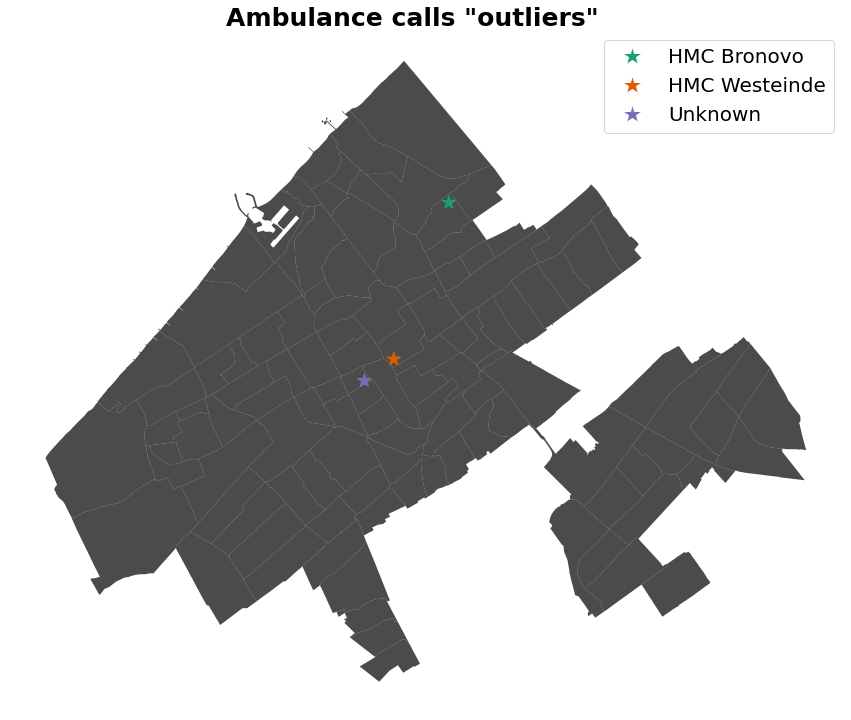

In [38]:
# Set up figure and axes
f, ax = plt.subplots(1, figsize=(15,15))
#plot map of The Hague
DH_shape.plot(ax=ax, facecolor='black', alpha=0.7)
# Plot outliers points
repetitive_sources.plot(ax=ax, marker='*', color=repetitive_sources['Colours'], markersize=200)
#creating a legend
legend_elements = [Line2D([0], [0], marker='*', color='w', label='HMC Bronovo',
                          markerfacecolor='#1b9e77', markersize=20),
                   Line2D([0], [0], marker='*', color='w', label='HMC Westeinde',
                          markerfacecolor='#d95f02', markersize=20),
                   Line2D([0], [0], marker='*', color='w', label='Unknown',
                          markerfacecolor='#7570b3', markersize=20)]
ax.legend(handles=legend_elements, fontsize=20)
#remove axis 
ax.set_axis_off()
#set figure title 
f.suptitle('Ambulance calls "outliers"', weight='bold', fontsize=25, x=0.5,y=0.84)
# Save figure to a PNG file
plt.savefig('Figure 5.jpg', dpi=1080)
plt.show()

Now we can drop all these three points from our gdf dataframe. 

In [39]:
gdf_new=gdf
for i in np.arange(0,3):
    index=gdf_new[(gdf_new['Longitude']==repetitive_sources.loc[i,'Longitude'])&(gdf_new['Latitude']==repetitive_sources.loc[i,'Latitude'])].index
    gdf_new=gdf_new.drop(index, axis=0).reset_index(drop=True)
gdf_new.shape

(46852, 8)

In [40]:
neigh_calls_new=gdf_new['neighb_cbs'].value_counts(sort=False)
neigh_calls_new=pd.DataFrame(neigh_calls_new)

In [41]:
neigh_calls_new=neigh_calls_new.rename(columns={'neighb_cbs':'Total calls'})
neigh_calls_new.head()

,Total calls
Bloemenbuurt-Oost,544
Rustenburg,349
De Velden,135
Parkbuurt oosteinde,115
Kerketuinen en Zichtenburg,328


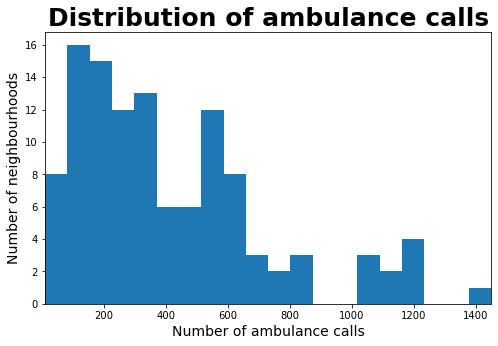

In [42]:
fig, ax = plt.subplots(1,1, figsize=(8,5)) 
ax.hist(neigh_calls_new['Total calls'], bins=20)
ax.set_xlabel('Number of ambulance calls', fontsize = 14)
ax.set_ylabel('Number of neighbourhoods', fontsize = 14)
ax.set_title('Distribution of ambulance calls', fontsize = 25, weight='bold')
ax.set_xlim(np.min(neigh_calls_new['Total calls']), np.max(neigh_calls_new['Total calls']))
# Save figure to a PNG file
plt.savefig('Figure 6.jpg', dpi=1080)
plt.show()

**OUR DISTRIBUTION FINALLY CHANGED ! IMPORTANT: We have to write in the report that we excluded these three outliers! Our model will be trained on a dataset that excluded these points, thus, we can not expect to correctly predict/evaluate the number of calls in the neighbourhoods that cointained those points !**

In [43]:
# first: join the DH_shape dataframe with the neigh_calls one 
DH_geo_calls_new=DH_shape.join(neigh_calls_new, on='neighb_cbs')
DH_geo_calls_new.head()

,neighb_cbs,neigb_cijf,geometry,Total calls
0,Oostduinen,70 Oostduinen,"POLYGON ((4.30290 52.12832, 4.30298 52.12827, ...",41
1,Belgisch Park,71 Belgisch Park,"POLYGON ((4.28056 52.11706, 4.28053 52.11706, ...",1450
2,Westbroekpark,73 Westbroekpark,"POLYGON ((4.29171 52.10745, 4.29181 52.10739, ...",157
3,Duttendel,74 Duttendel,"POLYGON ((4.32252 52.10768, 4.32252 52.10766, ...",128
4,Nassaubuurt,48 Nassaubuurt,"POLYGON ((4.31943 52.09247, 4.31943 52.09247, ...",110


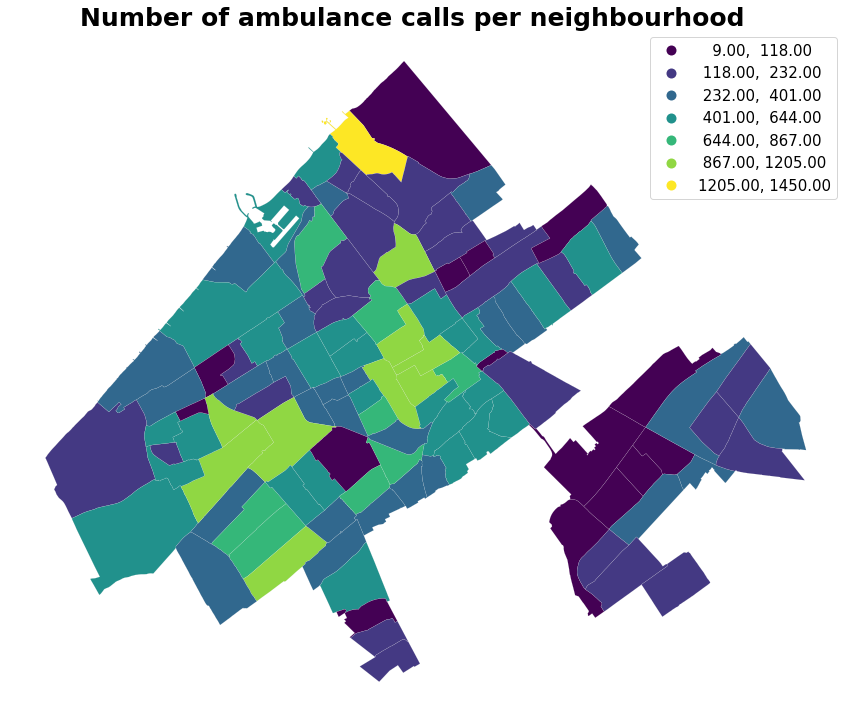

In [44]:
 # Set up figure and axes
f, ax = plt.subplots(1, figsize=(15,15))
# Plot base layer of The Hague in grey
DH_shape.plot(ax=ax, facecolor='grey', alpha=0.2, linewidth=0.1,)
DH_geo_calls_new.plot(ax=ax, column='Total calls', scheme='fisher_jenks', alpha=1, k=7, edgecolor='w', linewidth=0.1, legend=True, legend_kwds={'fontsize': '15'})
#remove axis 
ax.set_axis_off()
#set figure title 
f.suptitle('Number of ambulance calls per neighbourhood', weight='bold', fontsize=25, x=0.5,y=0.84)
# Save figure to a PNG file
plt.savefig('Figure 7.jpg', dpi=1080)
#display plot
plt.show()

## WHAT CAN WE ADD TO 'COMPLETE' OUR ANALYSIS?  

1. We can plot the three points cathegorised as outliers to show how their removal will impact the next geo-visualisation. 
2. Add more justification to the code.
2. Once we took away all the outliers we can save the last dataframe with neighbourhoods, polygons, and total number of calls per neighbourhood.
3. We can create a time series plot to see how the ambulance calls are distributed throughout the year. 
4. We should modify the histograms to make them 'prettier'.

## The struggle continues ... (almost done) 

This will be the dataframe we will save to continue our analysis. 

In [45]:
DH_geo_calls_new.head()

,neighb_cbs,neigb_cijf,geometry,Total calls
0,Oostduinen,70 Oostduinen,"POLYGON ((4.30290 52.12832, 4.30298 52.12827, ...",41
1,Belgisch Park,71 Belgisch Park,"POLYGON ((4.28056 52.11706, 4.28053 52.11706, ...",1450
2,Westbroekpark,73 Westbroekpark,"POLYGON ((4.29171 52.10745, 4.29181 52.10739, ...",157
3,Duttendel,74 Duttendel,"POLYGON ((4.32252 52.10768, 4.32252 52.10766, ...",128
4,Nassaubuurt,48 Nassaubuurt,"POLYGON ((4.31943 52.09247, 4.31943 52.09247, ...",110


In [46]:
DH_geo_calls_new=DH_geo_calls_new.rename(columns={'neighb_cbs':'Neighbourhood (CBS)','neigb_cijf':'Neighbourhood (Cij)', \
                                                  'Total calls':'Number of ambulance calls'})
DH_geo_calls_new.head()

,Neighbourhood (CBS),Neighbourhood (Cij),geometry,Number of ambulance calls
0,Oostduinen,70 Oostduinen,"POLYGON ((4.30290 52.12832, 4.30298 52.12827, ...",41
1,Belgisch Park,71 Belgisch Park,"POLYGON ((4.28056 52.11706, 4.28053 52.11706, ...",1450
2,Westbroekpark,73 Westbroekpark,"POLYGON ((4.29171 52.10745, 4.29181 52.10739, ...",157
3,Duttendel,74 Duttendel,"POLYGON ((4.32252 52.10768, 4.32252 52.10766, ...",128
4,Nassaubuurt,48 Nassaubuurt,"POLYGON ((4.31943 52.09247, 4.31943 52.09247, ...",110


In [47]:
#saving the dataframe to a csv file

#REMEMBER THAT (AT LEAST FOR NOW : FIRST TIME WE USE THIS CODE) WE ARE ANALYSING DATA FROM 2017 !!!

DH_geo_calls_new.to_csv('Geo-data calls/Geodata_2017.csv',index=False)